We can try to understand Machine Learning(ML) regression model whit this data.

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#import plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv']


## Information about data

In [57]:
data = pd.read_csv("../input/column_2C_weka.csv")

In [58]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


## Analyise

In [60]:
data.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


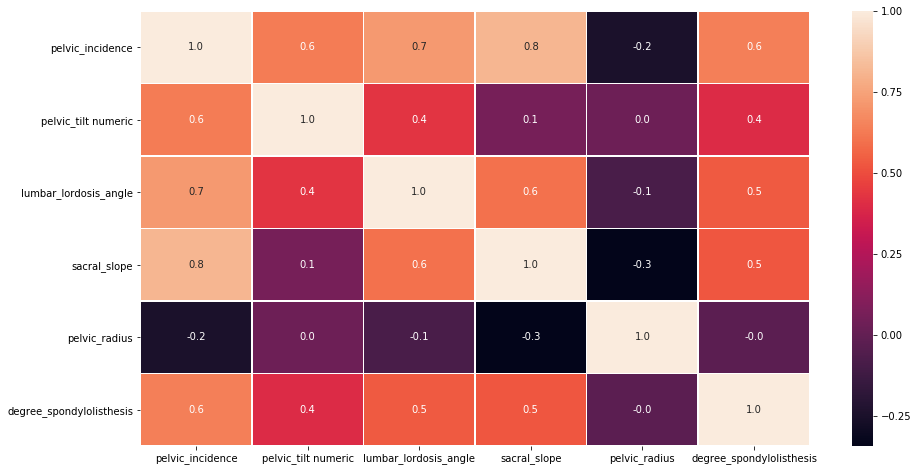

In [61]:
f,ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(),linewidths=.5,annot=True,fmt=".1f",ax=ax)
plt.show()

In [62]:
# import figure factory
import plotly.figure_factory as ff

# preparing data
data_matrix = data.loc[:,["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","sacral_slope","degree_spondylolisthesis"]]
data_matrix["index"] = np.arange(1,len(data_matrix)+1)


fig = ff.create_scatterplotmatrix(data_matrix,diag="histogram",index="index",colormap="Reds",colormap_type="cat",height=900,width=900)
iplot(fig)

How many Abnormal and Normal class which we have?

Abnormal    210
Normal      100
Name: class, dtype: int64

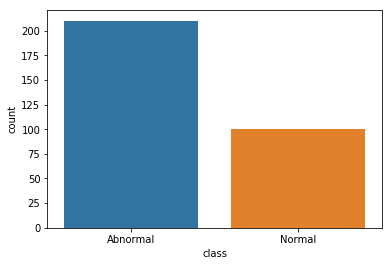

In [63]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

# Regression

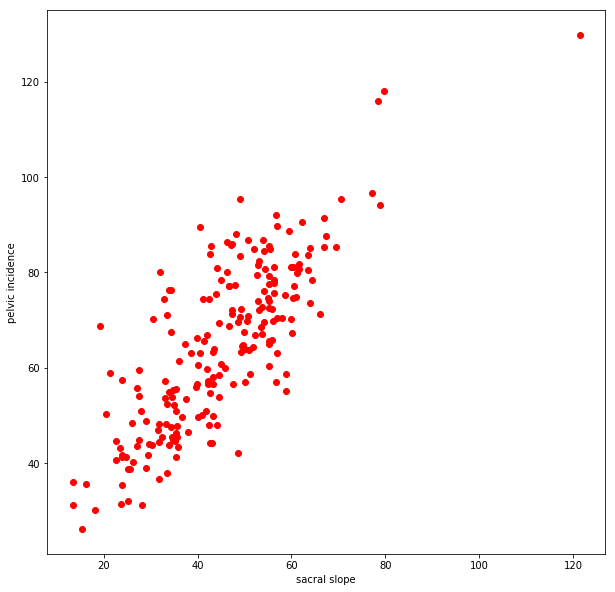

In [64]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data["class"]=="Abnormal"]
x1 = data1.sacral_slope.values.reshape(-1,1)
y1 = data1.pelvic_incidence.values.reshape(-1,1)

#Scatter
plt.figure(figsize=(10,10))
plt.scatter(x1,y1,color="red")
plt.xlabel("sacral slope")
plt.ylabel("pelvic incidence")
plt.show()

R^2 score:  0.6458410481075871


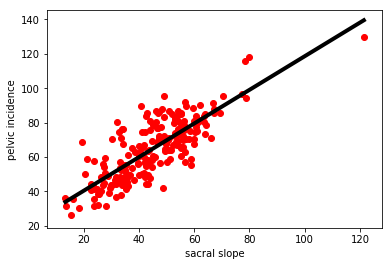

In [67]:
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_r = LinearRegression()

# for predict
predict_shape = np.linspace(min(x1),max(x1),num=len(x1))
# fit
linear_r.fit(x1,y1)
# predicted
predict_result = linear_r.predict(predict_shape)
# R^2
print("R^2 score: ",linear_r.score(x1,y1))
#print("R^2 score with metrics: ",r2_score(y1,predict_result))

# Plot regression line and scatter
plt.plot(predict_shape,predict_result,color="black",linewidth=4)
plt.scatter(x1,y1,color = "red")
plt.xlabel("sacral slope")
plt.ylabel("pelvic incidence")
plt.show()